# DSCI 235 Final Project - Winter Olympics / GDP
### By: Ethan Powers & Nathan Mitchell
##### Data Used:
First Source: https://raw.githubusercontent.com/BEthanPowerfuls90/DSCI235_Project/main/Winer%20Olympic%20Medals.csv             
Second Source: https://raw.githubusercontent.com/BEthanPowerfuls90/DSCI235_Project/main/gdp-per-capita-maddison-2020.csv

---
##### Description:
    For this project, we have analyzed data concerning the Winter Olympics since its induction in 1924 up until 2014. The 
    only years in which the Olympic Games did not take place were 1940 and 1944 due to World War II. To guide this project, we have come up with an overlying hypothesis: countries that are known for different winter sports compete well in those 
    categories in the Winter Olympics.

    For example, countries like Canada are known for their ice hockey while Russia is known for their figure skating. What we wish to examine with our data is to see  if they rank best for most overall medals and most Gold medals in this category. We also want to see how long they have been ranking this well, given we find that they are. On top of this, we also wish to know which countries rank for sports that aren’t as well known. Curling, for example, is an event at the Winter Olympics, but no immediate country comes to mind as to who may rank best in this event.

    We are also interested in seeing which countries have won the most total medals (Bronze, Silver, and Gold) and, more specifically, which have won the most Gold medals between the Winter Olympics in 1924 and 2014. For this, we will make a bar chart for the top 10 countries in both 1924 and 2014 according to the total number of medals they have won. Some of these countries may not have won any medals back in 1924 because they didn’t exist yet, but we will indicate that in the analysis.

    Another hypothesis that we wish to examine is to see if countries with higher average GDPs perform better in the Winter Olympics. To analyze this question, we will need to pull in data on GDP and compare the data between 1924 to 2018 to see if we can find any truth behind this statement. For this, we plan to make a line graph of GDP per year in the ten countries that have the highest GDPs and compare this to how many medals that country has won every year. To do this, we will only be considering countries that participate in the Winter Olympics.
 ---
 ##### Loading In The Data:

In [94]:
import pandas as pd
winter_raw = pd.read_csv('https://raw.githubusercontent.com/BEthanPowerfuls90/DSCI235_Project/main/Winer%20Olympic%20Medals.csv')

GDP = pd.read_csv('https://raw.githubusercontent.com/BEthanPowerfuls90/DSCI235_Project/main/gdp-per-capita-maddison-2020.csv').dropna(axis=1)

 ##### Creating a Multi-Index:

In [137]:
#Note: should only be run once
idx = pd.IndexSlice

gdp = GDP
gdp.rename(columns = {'Entity':'Country'}, inplace = True)
gdp = gdp.sort_values(by = ['Country', 'Year'], ascending=True)
gdp = gdp.loc[(gdp['Year'] >= 1924) & (gdp['Year'] <= 2018)]
gdp = gdp = gdp.reset_index()
gdp = gdp.loc[:, ['Country', 'Year', 'GDP per capita']]
gdp = gdp.set_index(['Country', 'Year'])


winter = winter_raw.sort_values(by = ['Country', 'Year', 'Sport'], ascending = True)
winter['Medal Rank'] = winter['Medal Rank'].apply(lambda x: 1)
winter = winter.set_index(['Country', 'Sport', 'Year', 'Medal'])
winter = winter.rename(columns = {'Medal Rank':'Medal Count'})

### Preliminary Analysis:

###### Each Participating Country and Medals they have Won by Type:

In [113]:
tot_med = winter.groupby(['Country', 'Medal']).aggregate('sum')
tot_med

Medal Count
Country      Medal              
Australia    bronze            4
             gold              5
             silver            3
Austria      bronze           81
             gold             59
...                          ...
West Germany bronze           13
             gold             11
             silver           15
Yugoslavia   bronze            1
             silver            3

[117 rows x 1 columns]

###### Teams Ranked by Total Number of Medals Won:

In [114]:
med_rank = tot_med.groupby(['Country']).sum().sort_values(by = 'Medal Count', ascending = False)
med_rank

,Medal Count
Country,
Norway,329
United States,282
Germany,228
Austria,218
Soviet Union,194
Canada,170
Finland,161
Sweden,144
Switzerland,138


###### Teams Ranked by Total Number of Gold Medals Won:

In [115]:
Gold = tot_med.loc[idx[:, 'gold', :]].sort_values(by = 'Medal Count', ascending = False)
Gold.head()

,,Medal Count
Country,Medal,
Norway,gold,118
United States,gold,96
Germany,gold,86
Soviet Union,gold,78
Canada,gold,62


###### Teams Ranked by Total Number of Silver Medals Won:

In [116]:
Silver = tot_med.loc[idx[:, 'silver', :]].sort_values(by = 'Medal Count', ascending = False)
Silver.head()

,,Medal Count
Country,Medal,
Norway,silver,111
United States,silver,102
Germany,silver,84
Austria,silver,78
Finland,silver,62


###### Teams Ranked by Total Number of Bronze Medals Won:

In [117]:
Bronze = tot_med.loc[idx[:, 'bronze', :]].sort_values(by = 'Medal Count', ascending = False)
Bronze.head()

,,Medal Count
Country,Medal,
Norway,bronze,100
United States,bronze,84
Austria,bronze,81
Soviet Union,bronze,59
Germany,bronze,58


    These preliminary findings suggest that Norway has won the most Gold, Silver, and Bronze medals at the Winter Olympics 
    since their induction until 2014. We now wish to get a rough estimate of how many of each of these medals they have won 
    at each Olympics by plotting their medals won over the years.

##### Plotting Medals Won Over Time - Norway

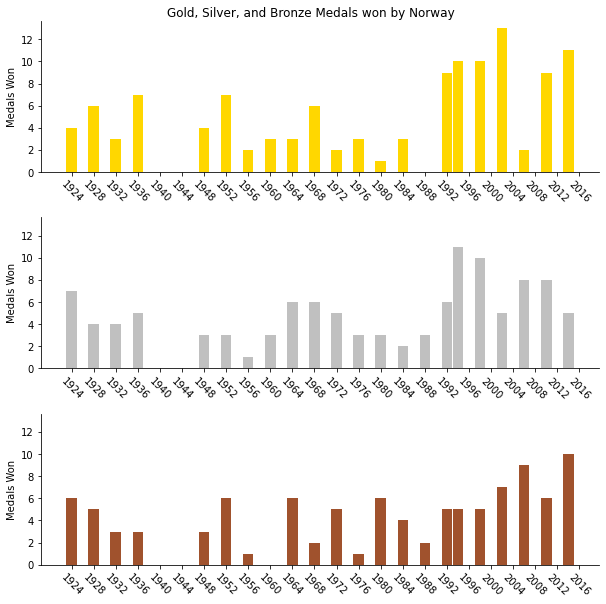

In [71]:
%matplotlib inline
import matplotlib.pylab as plt

fig, axs = plt.subplots(3, sharex = False, sharey = True)
fig.set_figheight(10); fig.set_figwidth(10)
plt.suptitle('Gold, Silver, and Bronze Medals won by Norway', y=.9)

#Plotting the number of gold medals won
medal_plot_gold = winter.groupby(['Country', 'Year', 'Medal']).aggregate('sum').loc[idx[:, :, 'gold', :]]

Norway_one_gold = medal_plot_gold.loc['Norway']['Medal Count'].loc[1924:1940]
Norway_two_gold = medal_plot_gold.loc['Norway']['Medal Count'].loc[1948:1984]
Norway_three_gold = medal_plot_gold.loc['Norway']['Medal Count'].loc[1988:1994]
Norway_four_gold = medal_plot_gold.loc['Norway']['Medal Count'].loc[1994:2014]

x1 = range(1924, 1940, 4); x2 = range(1948, 1985, 4); x3 = range(1992, 1995, 2); x4 = range(1994, 2015, 4)

axs[0].bar(x1, Norway_one_gold, color = 'gold', width = 1.9)
axs[0].bar(x2, Norway_two_gold, color = 'gold', width = 1.9)
axs[0].bar(x3, Norway_three_gold, color = 'gold', width = 1.9)
axs[0].bar(x4, Norway_four_gold, color = 'gold', width = 1.9)
plt.sca(axs[0])
plt.ylabel('Medals Won')
plt.xticks(range(1924, 2020, 4), rotation = -45)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

#Plotting the number of silver medals won
medal_plot_silver = winter.groupby(['Country', 'Year', 'Medal']).aggregate('sum').loc[idx[:, :, 'silver', :]]

Norway_one_silver = medal_plot_silver.loc['Norway']['Medal Count'].loc[1924:1940]
Norway_two_silver = medal_plot_silver.loc['Norway']['Medal Count'].loc[1948:1992]
Norway_three_silver = medal_plot_silver.loc['Norway']['Medal Count'].loc[1994:2014]

x5 = range(1948, 1995, 4)

axs[1].bar(x1, Norway_one_silver, color = 'silver', width = 1.9)
axs[1].bar(x5, Norway_two_silver, color = 'silver', width = 1.9)
axs[1].bar(x4, Norway_three_silver, color = 'silver', width = 1.9)
plt.sca(axs[1])
plt.ylabel('Medals Won')
plt.xticks(range(1924, 2020, 4), rotation = -45)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

#Plotting the number of bronze medals won
medal_plot_bronze = winter.groupby(['Country', 'Year', 'Medal']).aggregate('sum').loc[idx[:, :, 'bronze', :]]

Norway_one_bronze = medal_plot_bronze.loc['Norway']['Medal Count'].loc[1924:1940]
Norway_two_bronze = medal_plot_bronze.loc['Norway']['Medal Count'].loc[1948:1956]
Norway_three_bronze = medal_plot_bronze.loc['Norway']['Medal Count'].loc[1964:1992]
Norway_four_bronze = medal_plot_bronze.loc['Norway']['Medal Count'].loc[1994:2014]

x6 = range(1948, 1957, 4); x7 = range(1964, 1995, 4); x8 = range(1994, 2015, 4)

axs[2].bar(x1, Norway_one_bronze, color = 'sienna', width = 1.9)
axs[2].bar(x6, Norway_two_bronze, color = 'sienna', width = 1.9)
axs[2].bar(x7, Norway_three_bronze, color = 'sienna', width = 1.9)
axs[2].bar(x8, Norway_four_bronze, color = 'sienna', width = 1.9)
plt.sca(axs[2])
plt.ylabel('Medals Won')
plt.xticks(range(1924, 2020, 4), rotation = -45)
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)

plt.subplots_adjust(hspace = .3)

    One of the first things we noticed from creating this plot was that the years did not line up properly. The first Winter Olympics was held in 1924. If held every four years, there should have been games in 2016 and 2020. This, however, is   not the case. What we learned is that in the 1990s the games were changed to happen in-between when the Summer Olympics, so the Winter Olympics were held in 1992 and the again two years later in 1994. Visually, this can be seen by looking at the numbers of medals won 1994 and beyond. Instead of occuring on a tick, they appear between ticks.
    
    We noticed two things of interest here. First, as stated before, there is a break in medals won from the 1944 and 1948  Winter Olympics becaues of WWII. The second thing of interest is that Norway did not win any Gold medals in any category in the 1988 Winter Olympics. They also did not win any Bronze medals in 1960.
   

#### Percentage Medals Won by Year

<BarContainer object of 6 artists>

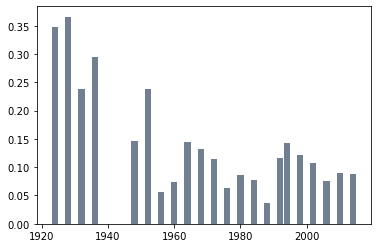

In [69]:
sport = winter_raw.loc[:, ['Year', 'Medal']].set_index(['Year']).sort_values(by = 'Year')
sport['Medal'] = sport['Medal'].apply(lambda x: 1)
sport = sport.groupby(['Year']).aggregate('sum')

norway_tot = pd.DataFrame(winter.groupby(['Country', 'Year']).aggregate('sum').loc['Norway']['Medal Count'])
norway_tot['AVG'] = (norway_tot.loc[:]['Medal Count'] / sport.loc[:]['Medal'])

x1 = range(1924, 1940, 4); x2 = range(1948, 1994, 4); x3 = range(1992, 1996, 2); x4 = range(1994, 2015, 4)

Norway_one = norway_tot.loc[:]['AVG'].loc[1924:1940]; Norway_two = norway_tot.loc[:]['AVG'].loc[1948:1992]
Norway_three = norway_tot.loc[:]['AVG'].loc[1992:1995]; Norway_four = norway_tot.loc[:]['AVG'].loc[1994:2015]

plt.bar(x1, Norway_one, color = 'slategray', width = 1.9); plt.bar(x2, Norway_two, color = 'slategray', width = 1.9)
plt.bar(x3, Norway_three, color = 'slategray', width = 1.9); plt.bar(x4, Norway_four, color = 'slategray', width = 1.9)

    This result greatly suprised us. Our hypothesis was that the reason Norway saw an increase in medals won was because of the addition of new events each year. This graph suggests otherwise. It shows that Norway won a higer percentage of 
    medals, near 35% of available medals, when the first Winter Olympics were held, and only won around 10% of available 
    medals in the 2014 games. This suggests that the number of medals Norway has won has remained relatively the same as the number of medals has increased. Looking back, the number of medals that Norway has won does seem to be flatter than previously stated.

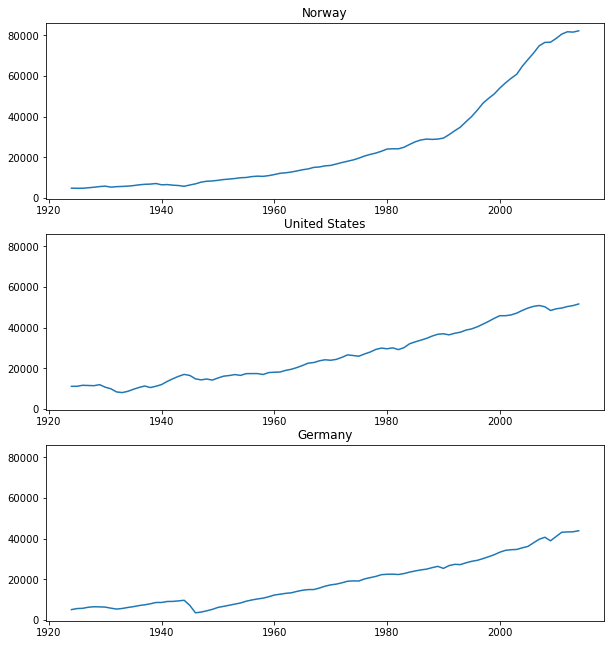

In [248]:
fig, axs = plt.subplots(3, sharex = False, sharey = True)
fig.set_figheight(11); fig.set_figwidth(10)

countries = pd.DataFrame(med_rank.reset_index()['Country']).set_index('Country').sort_values(by='Country')
GDP.set_index('Country')
both = pd.merge(GDP, countries, on='Country').sort_values(by = ['Country', 'Year'], ascending=True)
both = both.loc[(both['Year'] >= 1924) & (both['Year'] <= 2014)].set_index(['Country'])

both_norway = both.loc['Norway']['GDP per capita']
both_america = both.loc['United States']['GDP per capita']
both_germany = both.loc['Germany']['GDP per capita']

x = range(1924, 2015)
axs[0].plot(x, both_norway)
axs[0].title.set_text('Norway')

axs[1].plot(x, both_america)
axs[1].title.set_text('United States')

axs[2].plot(x, both_germany)
axs[2].title.set_text('Germany')

In [260]:
both.groupby(['Country']).aggregate('mean').loc[:, ['GDP per capita']].sort_values(by='GDP per capita', ascending=False).head(10)

,GDP per capita
Country,
Luxembourg,31473.638308
United States,26569.426593
Norway,25470.378791
Switzerland,25028.378901
Denmark,21576.349670
Canada,21279.738791
Australia,21265.150659
Netherlands,20457.377692
Sweden,20166.120000
